In [1]:
# OPERATIONAL PACKAGES ---------------------------------------
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from math import inf
import scipy as sp
from scipy.optimize import curve_fit

# STYLE RESOURCES ---------------------------------------
plt.style.reload_library()
plt.style.use(['science', 'grid'])

# FITTING PACKAGES ---------------------------------------
from lmfit import Model, Parameters
import scipy.optimize as optimization
from IPython.display import display, Markdown

In [40]:
# FUNCTION FOR PLOTTING A SCATTER PLOT ---------------------------------------
def ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label):
    
    # SCATTER PLOT
    fig = plt.figure(figsize=(5, 5), dpi=80)
    plt.errorbar(xdata,ydata,yerr=error_y,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    plt.errorbar(xdata,ydata,xerr=error_x,capsize = 5,marker = 'o',markersize=4, linestyle = 'None',color='black')
    
    plt.xlabel(r'$\textit{'+ x_label +'}$', fontsize = 16)
    plt.ylabel(r'$\textit{'+ y_label +'}$', fontsize = 16)
    #plt.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    #plt.ticklabel_format(axis="x", style="sci", scilimits=(0,0))
    plt.xticks(np.arange(xdata.min(),xdata.max(),0.4), fontsize=15)
    plt.yticks(fontsize=15)
    #plt.xticks(fontsize=15)
    plt.savefig("Figures/figure1.png")

# DEFINING A FUNCTION THAT RETURNS COUNTING ERROR
count_error = lambda val : np.sqrt(val)

# FITTING FUNCTIONS
Gaussian = lambda x,a,b,c,d : a*np.exp((-(x-b)**2)/(2*c**2)) + d

def FUNCTION_FIT(xdata, ydata, error_x, error_y, color, x_label, y_label, function):
    
    # Plotting scatter plot first
    ScatterPlot(xdata,ydata,error_x,error_y,color,x_label,y_label)
    
    # Finding best fit value
    optimal = optimization.curve_fit(function, xdata, ydata, np.array([25,48,1,5]), error_y)
    a, b, c, d = optimal[0][0], optimal[0][1], optimal[0][2], optimal[0][3]
    pars, cov = curve_fit(f=function, xdata=xdata, ydata=ydata, p0=[a, b, c, d], bounds=(-np.inf, np.inf))
    stdevs = np.sqrt(np.diag(cov))
    chi_squared = np.sum((function(xdata, *pars) - ydata)**2/error_y**2)
    red_chi_squared = chi_squared/(np.size(ydata)-np.size(pars))
    p_value = 1.000-sp.stats.chi2.cdf(chi_squared,(np.size(ydata)-np.size(pars)))
    variables = ['a', 'b', 'c', 'd']
    display(Markdown('## Fit Statistics'))
    df2 = pd.DataFrame()
    df2["Dof"] = [np.size(ydata)-np.size(pars)]
    df2["p-value"] = [p_value]
    df2["$\chi^2$"] = [chi_squared]
    df2["$\overline{\chi}^2$"] = [red_chi_squared]
    display(df2)
    
    display(Markdown('## Variables'))
    df = pd.DataFrame()
    df["Name"] = variables
    df["Value"] = pars
    df["Std"] = stdevs
    display(df)
     
    # Plotting Fitted Function
    a, b, c, d = pars[0], pars[1], pars[2], pars[3]
    da, db, dc, dd = stdevs[0], stdevs[1], stdevs[2], stdevs[3]
    x = np.arange(xdata.min(), xdata.max(), (xdata.max()-xdata.min())/1000) 
    y = function(x,a,b,c,d)
    xmax = x[np.where(y == y.max())[0][0]]
    label = r'$\theta = \ $' + str("{:.2f}".format(xmax)) + '$^\circ$'
    plt.plot(x, function(x,a,b,c,d), color=color)
    plt.axvline(x=xmax, color='k', linestyle='--', label=label)
    
    #VERTICAL LINE 
    plt.legend(prop={'size': 12}, loc=1)
    
    plt.savefig("Figures/figure.png")
    plt.show()
    
    return [variables, pars, stdevs]

# DEFINING A FUNCTION THAT RETURNS THE UNCERTAINTY USING VARIATIONAL METHOD ---------------------------------------
def uncertainty_var(values, deltas, function):
    values, deltas = np.array(values), np.array(deltas)
    delta_matrix = deltas*np.identity(values.shape[0])
    sum = 0
    for delta in delta_matrix:
        sum += (0.5*(abs(function(values + delta) - function(values)) + abs(function(values-delta) - function(values))))**2
    return np.sqrt(sum)

# DEFINING A FUNCTION THAT RETURNS THE WEIGHTED AVERAGE WITH UNCERTAINTY
def weighted_avgs(values, deltas):
    weights = np.array(list(map(lambda x : 1/x**2, deltas)))
    best_val = np.dot(np.array(values), weights)/weights.sum()
    uncert = 1/np.sqrt(weights.sum())
    return [best_val, uncert]

-----
### UKNOWN POWDER
-----

In [3]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1qogTfmCQXAS6o2U-FCVnL6LUQsT4V-npiPWFMsUuwH8'
workSheetName = 'Unknown_Powder'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df['Imp_error'] = df.apply(lambda x: count_error(x['Imp/s']), axis=1)
df

,Theta,Imp/s,Imp_error
0,20.0,28,5.291503
1,20.1,32,5.656854
2,20.2,31,5.567764
3,20.3,30,5.477226
4,20.4,29,5.385165
...,...,...,...
316,51.6,16,4.000000
317,51.7,16,4.000000
318,51.8,18,4.242641
319,51.9,18,4.242641


## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,17,0.999998,1.834986,0.10794


## Variables

,Name,Value,Std
0,a,2.813368,2.323343
1,b,49.121232,0.136080
2,c,0.552732,0.493342
3,d,16.594402,2.513037


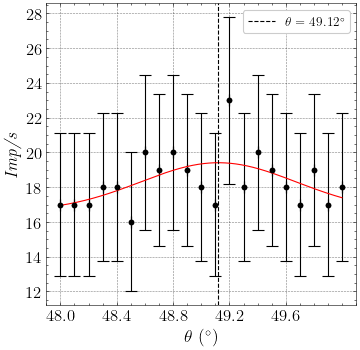

In [43]:
# PLOTTING OUR DATA ---------------------------------------
minVal, maxVal = 48, 50
df_filtered = df[(df['Theta'] >= minVal) & (df['Theta'] <= maxVal)]
#df_filtered = df
xdata, ydata, error_x, error_y = df_filtered['Theta'], df_filtered['Imp/s'], 0, df_filtered['Imp_error']
#results = ScatterPlot(xdata, ydata, error_x, error_y, 'red', r'$\theta \ (^\circ)$', 'Imp/s')
results = FUNCTION_FIT(xdata, ydata, error_x, error_y, 'red', r'$\theta \ (^\circ)$', 'Imp/s', Gaussian)

In [44]:
# SUMMARIZING DATA AND FINDING FUNCTION
func = lambda params : ((np.sin(params[0]*np.pi/180))**2)/params[1]  # [theta, sum]
thetas = [22.307099, 25.989620, 38.329353, 46.588518]
thetas_uncert = [0.007528, 0.012842, 0.023033, 0.016267]
sc = [1,2,3,4]
fcc = [3,4,8,11]
bcc = [2,4,6,8]
dictData = {'Theta' : thetas, 'Delta_Theta' : thetas_uncert, 'sc hkl' : sc, 'fcc hkl' : fcc, 'bcc hkl' : bcc}
df_global = pd.DataFrame(dictData)
df_global['Function_sc'] = df_global.apply(lambda x: func([x['Theta'], x['sc hkl']]), axis=1)
df_global['Function_fcc'] = df_global.apply(lambda x: func([x['Theta'], x['fcc hkl']]), axis=1)
df_global['Function_bcc'] = df_global.apply(lambda x: func([x['Theta'], x['bcc hkl']]), axis=1)
df_global['Uncertainty_sc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['sc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global['Uncertainty_fcc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['fcc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global['Uncertainty_bcc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['bcc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global

,Theta,Delta_Theta,sc hkl,fcc hkl,bcc hkl,Function_sc,Function_fcc,Function_bcc,Uncertainty_sc,Uncertainty_fcc,Uncertainty_bcc
0,22.307099,0.007528,1,3,2,0.144074,0.048025,0.072037,0.000092,0.000031,0.000046
1,25.989620,0.012842,2,4,4,0.096013,0.048007,0.048007,0.000088,0.000044,0.000044
2,38.329353,0.023033,3,8,6,0.128208,0.048078,0.064104,0.000130,0.000049,0.000065
3,46.588518,0.016267,4,11,8,0.131928,0.047974,0.065964,0.000071,0.000026,0.000035


In [46]:
# USING WEIGHTED AVERAGES TO DETERMINE THE FUNCTION VALUE
function, function_uncert = weighted_avgs(df_global['Function_fcc'], df_global['Uncertainty_fcc'])
wavelength = 0.15428e-9 # m 

# FINDING THE LATTICE CONSTANT
lattice_constant_calc = lambda params: (params[1]/2)*np.sqrt(1/params[0])   # [function, lambda]
lattice_constant, lattice_constant_uncert = lattice_constant_calc([function, wavelength]), uncertainty_var([function, wavelength], [function_uncert, 0], lattice_constant_calc)
print('Lattice constant a (pm)')
lattice_constant*1e12, lattice_constant_uncert *1e12

Lattice constant a (pm)


(352.0706875758595, 0.06203378850335479)

In [47]:
# DETERMINING THE %ERROR
exp, theor, unc = lattice_constant*1e12, 352.4, lattice_constant_uncert *1e12
error = abs((exp-theor)/theor)*100
print("Percentage error: ", error, "%")
exp_precision = 100*exp/unc
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  0.09344847450070447 %
Experimental precision: 567546.6484798352 %
Sigmas: 1.6465338091768268e-07


-----
### UKNOWN METAL
-----

In [8]:
# READING THE DATA FROM GOOGLE SHEETS ---------------------------------------
googleSheetId = '1qogTfmCQXAS6o2U-FCVnL6LUQsT4V-npiPWFMsUuwH8'
workSheetName = 'Unknown_Metal'
URL = 'https://docs.google.com/spreadsheets/d/{0}/gviz/tq?tqx=out:csv&sheet={1}'.format(googleSheetId, workSheetName)
df = pd.read_csv(URL)
df['Imp_error'] = df.apply(lambda x: count_error(x['Imp/s']), axis=1)
df

,Theta,Imp/s,Imp_error
0,17.0,28,5.291503
1,17.1,30,5.477226
2,17.2,28,5.291503
3,17.3,27,5.196152
4,17.4,28,5.291503
...,...,...,...
326,49.6,8,2.828427
327,49.7,7,2.645751
328,49.8,7,2.645751
329,49.9,7,2.645751


## Fit Statistics

,Dof,p-value,$\chi^2$,$\overline{\chi}^2$
0,8,0.999882,0.484241,0.06053


## Variables

,Name,Value,Std
0,a,5.636521,0.981642
1,b,47.936299,0.020830
2,c,0.265798,0.059816
3,d,6.443584,1.074851


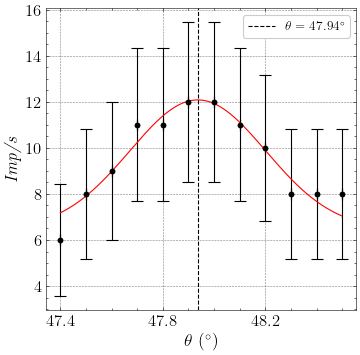

In [61]:
# PLOTTING OUR DATA ---------------------------------------
minVal, maxVal = 47.4, 48.5
df_filtered = df[(df['Theta'] >= minVal) & (df['Theta'] <= maxVal)]
#df_filtered = df
xdata, ydata, error_x, error_y = df_filtered['Theta'], df_filtered['Imp/s'], 0, df_filtered['Imp_error']
#results = ScatterPlot(xdata, ydata, error_x, error_y, 'red', r'$\theta \ (^\circ)$', 'Imp/s')
results = FUNCTION_FIT(xdata, ydata, error_x, error_y, 'red', r'$\theta \ (^\circ)$', 'Imp/s', Gaussian)

In [94]:
# SUMMARIZING DATA AND FINDING FUNCTION
func = lambda params : ((np.sin(params[0]*np.pi/180))**2)/params[1]  # [theta, sum]
thetas = [19.667087, 28.220516, 35.286107, 41.671051, 47.936299]
thetas_uncert = [0.005356, 0.022436, 0.019096, 0.014736, 0.020830]
sc = [1,2,3,4,5]
fcc = [3,4,8,11,12]
bcc = [2,4,6,8,10]
dictData = {'Theta' : thetas, 'Delta_Theta' : thetas_uncert, 'sc hkl' : sc, 'fcc hkl' : fcc, 'bcc hkl' : bcc}
df_global = pd.DataFrame(dictData)
df_global['Function_sc'] = df_global.apply(lambda x: func([x['Theta'], x['sc hkl']]), axis=1)
df_global['Function_fcc'] = df_global.apply(lambda x: func([x['Theta'], x['fcc hkl']]), axis=1)
df_global['Function_bcc'] = df_global.apply(lambda x: func([x['Theta'], x['bcc hkl']]), axis=1)
df_global['Uncertainty_sc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['sc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global['Uncertainty_fcc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['fcc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global['Uncertainty_bcc'] = df_global.apply(lambda x: uncertainty_var([x['Theta'], x['bcc hkl']], [x['Delta_Theta'], 0], func), axis=1)
df_global

,Theta,Delta_Theta,sc hkl,fcc hkl,bcc hkl,Function_sc,Function_fcc,Function_bcc,Uncertainty_sc,Uncertainty_fcc,Uncertainty_bcc
0,19.667087,0.005356,1,3,2,0.113269,0.037756,0.056634,0.000059,0.000020,0.000030
1,28.220516,0.022436,2,4,4,0.111801,0.055901,0.055901,0.000163,0.000082,0.000082
2,35.286107,0.019096,3,8,6,0.111230,0.041711,0.055615,0.000105,0.000039,0.000052
3,41.671051,0.014736,4,11,8,0.110507,0.040185,0.055254,0.000064,0.000023,0.000032
4,47.936299,0.020830,5,12,10,0.110232,0.045930,0.055116,0.000072,0.000030,0.000036


In [107]:
# USING WEIGHTED AVERAGES TO DETERMINE THE FUNCTION VALUE
function, function_uncert = weighted_avgs(df_global['Function_sc'], df_global['Uncertainty_sc'])
wavelength = 0.15428e-9 # m 

# FINDING THE LATTICE CONSTANT
lattice_constant_calc = lambda params: (params[1]/2)*np.sqrt(1/params[0])   # [function, lambda]
lattice_constant, lattice_constant_uncert = lattice_constant_calc([function, wavelength]), uncertainty_var([function, wavelength], [function_uncert, 0], lattice_constant_calc)
print('Lattice constant a (pm)')
lattice_constant*1e12, lattice_constant_uncert *1e12

Lattice constant a (pm)


(231.0102547578439, 0.03553337961944009)

In [108]:
# USING WEIGHTED AVERAGES TO DETERMINE THE FUNCTION VALUE
function, function_uncert = weighted_avgs(df_global['Function_fcc'], df_global['Uncertainty_fcc'])
wavelength = 0.15428e-9 # m 

# FINDING THE LATTICE CONSTANT
lattice_constant_calc = lambda params: (params[1]/2)*np.sqrt(1/params[0])   # [function, lambda]
lattice_constant, lattice_constant_uncert = lattice_constant_calc([function, wavelength]), uncertainty_var([function, wavelength], [function_uncert, 0], lattice_constant_calc)
print('Lattice constant a (pm)')
lattice_constant*1e12, lattice_constant_uncert *1e12

Lattice constant a (pm)


(382.2236293692815, 0.059035449462301826)

In [109]:
# DETERMINING THE %ERROR
exp, theor, unc = lattice_constant*1e12, 380.34, lattice_constant_uncert *1e12
error = abs((exp-theor)/theor)*100
print("Percentage error: ", error, "%")
exp_precision = 100*exp/unc
print('Experimental precision:', exp_precision, '%')
print('Sigmas:', error/exp_precision)

Percentage error:  0.4952488219176395 %
Experimental precision: 647447.6485748745 %
Sigmas: 7.649248908506402e-07
